Found 1737 images belonging to 7 classes.
109/109 [==============================] - 13s 107ms/step - loss: 0.1794 - accuracy: 0.9476

Test Loss: 0.1794
Test Accuracy: 0.9476
109/109 [==============================] - 12s 101ms/step


Text(0.5, 25.722222222222214, 'Metrics')

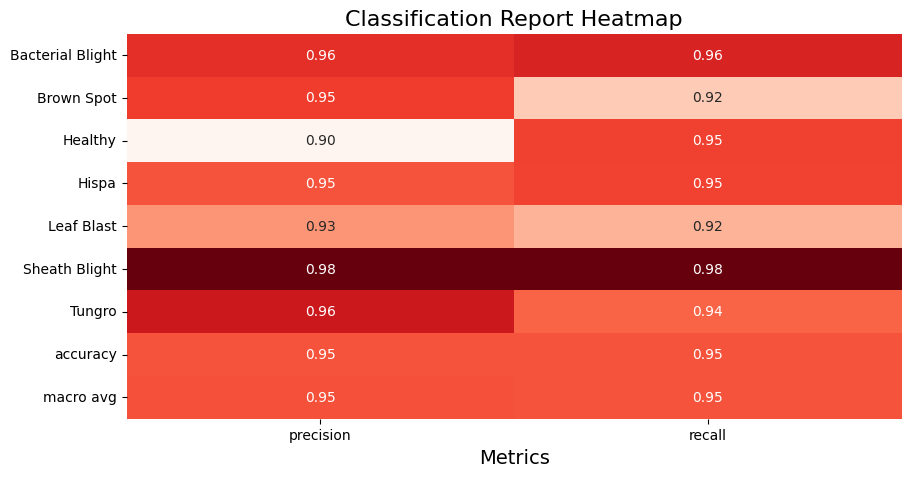

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Rebuild the model architecture
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)  # Adjust to the number of classes

model = Model(inputs=base_model.input, outputs=predictions)

# Load the model weights
model.load_weights('D:\\CADT\\CapstoneProjectI\\ml__model\\models\\efficientnetb0_weights.h5')

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Test directory
test_dir = r'D:\CADT\CapstoneProjectI\ml__model\data\splited_data\test'

# Image dimensions and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16

# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())



# Plot Classification Report Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.ylabel('Metrics')
plt.xlabel('Classes')
plt.show()

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot the heatmap
# Generate a classification report
report = classification_report(true_labels, pred_labels, target_names=list(test_ds.class_indices.keys()), output_dict=True)
# Convert the report to a DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap=plt.cm.Reds, fmt=".2f", cbar=False)
plt.title('Classification Report Heatmap', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Classes', fontsize=14)
plt.show()

In [4]:
# Rebuild the model architecture
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)  # Adjust to the number of classes

model = Model(inputs=base_model.input, outputs=predictions)

# Load the model weights
model.load_weights('D:\\CADT\\CapstoneProjectI\\ml__model\\models\\efficientnetb0_weights.h5')

# Compile the model (ensure you specify the optimizer and loss function)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Test directory
test_dir = r'D:\CADT\CapstoneProjectI\ml__model\data\splited_data\test'

# Image dimensions and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16

# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Continue with your predictions and reports...

Found 1737 images belonging to 7 classes.
109/109 [==============================] - 26s 121ms/step - loss: 0.1794 - accuracy: 0.9476

Test Loss: 0.1794
Test Accuracy: 0.9476


Found 1737 images belonging to 7 classes.
109/109 [==============================] - 24s 127ms/step - loss: 0.1794 - accuracy: 0.9476

Test Loss: 0.1794
Test Accuracy: 0.9476
109/109 [==============================] - 13s 112ms/step

Classification Report:
                  precision    recall  f1-score   support

Bacterial Blight       0.96      0.96      0.96       250
      Brown Spot       0.95      0.92      0.93       242
         Healthy       0.90      0.95      0.93       249
           Hispa       0.95      0.95      0.95       247
      Leaf Blast       0.93      0.92      0.93       250
   Sheath Blight       0.98      0.98      0.98       249
          Tungro       0.96      0.94      0.95       250

        accuracy                           0.95      1737
       macro avg       0.95      0.95      0.95      1737
    weighted avg       0.95      0.95      0.95      1737



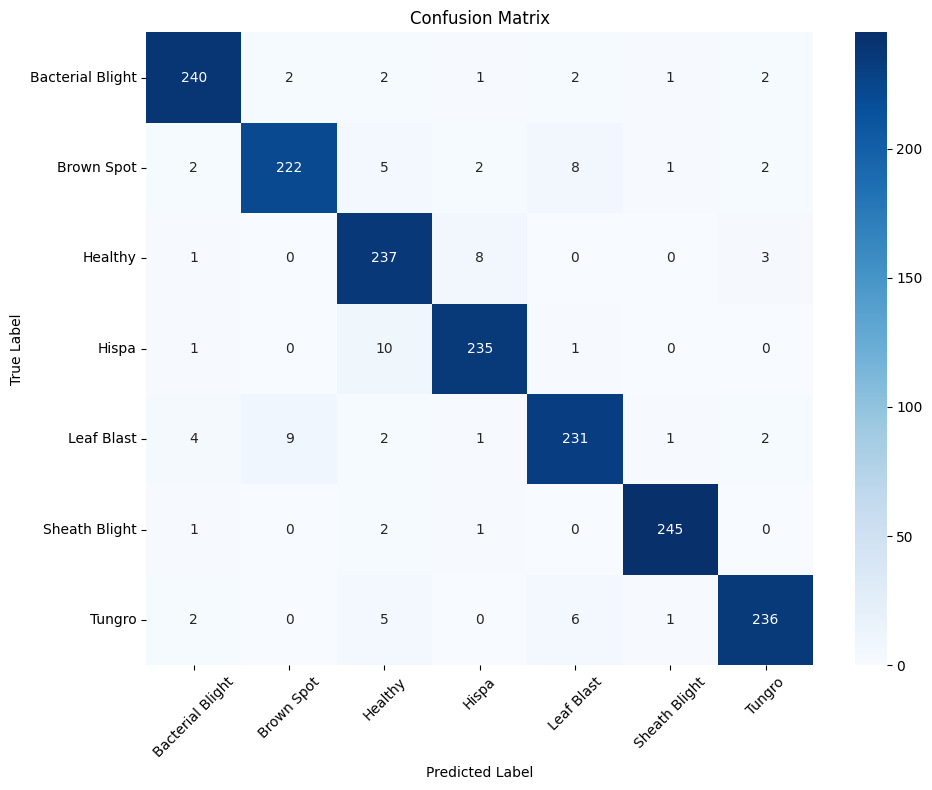


Sample Predictions (First 10):
Sample 1: True: Bacterial Blight, Predicted: Bacterial Blight, Confidence: 1.0000
Sample 2: True: Bacterial Blight, Predicted: Bacterial Blight, Confidence: 1.0000
Sample 3: True: Bacterial Blight, Predicted: Bacterial Blight, Confidence: 0.9228
Sample 4: True: Bacterial Blight, Predicted: Bacterial Blight, Confidence: 0.9999
Sample 5: True: Bacterial Blight, Predicted: Bacterial Blight, Confidence: 0.9999
Sample 6: True: Bacterial Blight, Predicted: Bacterial Blight, Confidence: 0.9995
Sample 7: True: Bacterial Blight, Predicted: Bacterial Blight, Confidence: 1.0000
Sample 8: True: Bacterial Blight, Predicted: Hispa, Confidence: 0.9964
Sample 9: True: Bacterial Blight, Predicted: Bacterial Blight, Confidence: 1.0000
Sample 10: True: Bacterial Blight, Predicted: Bacterial Blight, Confidence: 1.0000


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Rebuild the model architecture
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)  # Adjust to the number of classes

model = Model(inputs=base_model.input, outputs=predictions)

# Load the model weights
model.load_weights('D:\\CADT\\CapstoneProjectI\\ml__model\\models\\efficientnetb0_weights.h5')

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Test directory
test_dir = r'D:\CADT\CapstoneProjectI\ml__model\data\splited_data\test'

# Image dimensions and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16

# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions
test_generator.reset()  # Reset generator to start
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Print some sample predictions
print("\nSample Predictions (First 10):")
for i in range(min(10, len(test_generator))):
    true_label = class_labels[true_classes[i]]
    pred_label = class_labels[predicted_classes[i]]
    confidence = predictions[i][predicted_classes[i]]
    print(f"Sample {i+1}: True: {true_label}, Predicted: {pred_label}, Confidence: {confidence:.4f}")


Incorrect Predictions:
Image: Bacterial Blight\bacterial blight_0169.jpg, True: Bacterial Blight, Predicted: Hispa, Confidence: 0.9964
Image: Bacterial Blight\bacterial blight_0238.jpg, True: Bacterial Blight, Predicted: Healthy, Confidence: 0.6228
Image: Bacterial Blight\bacterial blight_0299.jpg, True: Bacterial Blight, Predicted: Healthy, Confidence: 0.8519
Image: Bacterial Blight\bacterial blight_0464.jpg, True: Bacterial Blight, Predicted: Tungro, Confidence: 0.9714
Image: Bacterial Blight\bacterial blight_0465.jpg, True: Bacterial Blight, Predicted: Sheath Blight, Confidence: 0.7708
Image: Bacterial Blight\bacterial blight_0479.jpg, True: Bacterial Blight, Predicted: Leaf Blast, Confidence: 0.9971
Image: Bacterial Blight\bacterial blight_1259.jpg, True: Bacterial Blight, Predicted: Leaf Blast, Confidence: 0.4792
Image: Bacterial Blight\bacterial blight_1415.jpg, True: Bacterial Blight, Predicted: Brown Spot, Confidence: 0.6665
Image: Bacterial Blight\bacterial blight_1456.jpg, T

NameError: name 'true_labels' is not defined

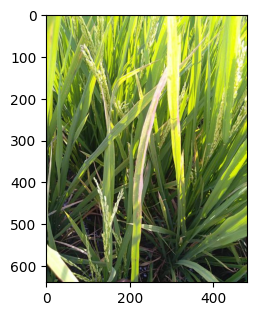

In [2]:
# Identify incorrect predictions
incorrect_indices = np.where(predicted_classes != true_classes)[0]
incorrect_images = test_generator.filenames  # Get image filenames
incorrect_labels = true_classes[incorrect_indices]  # Get true labels
incorrect_preds = predicted_classes[incorrect_indices]  # Get predicted labels

# Print incorrect predictions
print("\nIncorrect Predictions:")
for idx in incorrect_indices:
    true_label = class_labels[true_classes[idx]]
    pred_label = class_labels[predicted_classes[idx]]
    confidence = predictions[idx][predicted_classes[idx]]
    print(f"Image: {test_generator.filenames[idx]}, True: {true_label}, Predicted: {pred_label}, Confidence: {confidence:.4f}")

# Optional: Display the first few incorrect predictions
num_to_display = min(5, len(incorrect_indices))  # Limit to 5 images for display
plt.figure(figsize=(15, 5))
for i in range(num_to_display):
    img_path = test_dir + '/' + incorrect_images[incorrect_indices[i]]
    img = plt.imread(img_path)
    plt.subplot(1, num_to_display, i + 1)
    plt.imshow(img)
    plt.title(f"True: {true_labels[incorrect_indices[i]]}\nPred: {pred_labels[incorrect_indices[i]]}")
    plt.axis('off')
plt.show()